<a href="https://colab.research.google.com/github/MahdiBouzaher/Facial_emotion_recognition_with_ML/blob/main/FER_with_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Image Processing & Feature Extraction
from scipy import ndimage as ndi
from scipy.stats import skew, kurtosis
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor_kernel
from skimage.measure import shannon_entropy

# Preprocessing & Decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Metrics & Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay
)

# Handling Class Imbalance
from imblearn.over_sampling import SMOTE


In [ ]:
emotions_labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

JAFFE_train_path = "/content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train"
JAFFE_test_path = "/content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test"

CK_train_path = "/content/drive/MyDrive/AI_assignement_1/CK_dataset/train"
CK_test_path = "/content/drive/MyDrive/AI_assignement_1/CK_dataset/test"


In [ ]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)


In [ ]:
def load_data(path):
  input_data = []
  labels = []
  print(f"Starting to load data from: {path}")
  for emotion in emotions_labels:
    emotion_path = os.path.join(path, emotion)
    print(f"  Loading emotion: {emotion} from {emotion_path}")
    for filename in os.listdir(emotion_path):
      img_path = os.path.join(emotion_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)
        input_data.append(img)
        labels.append(emotions_labels.index(emotion))
      else:
        print(f"    Warning: Could not load image {img_path}. Skipping.")
  print(f"Finished loading data. Total images: {len(input_data)}")
  return np.array(input_data), np.array(labels)

In [ ]:
jaffe_train_X, jaffe_train_y = load_data(JAFFE_train_path)
jaffe_test_X, jaffe_test_y = load_data(JAFFE_test_path)

ck_train_X, ck_train_y = load_data(CK_train_path)
ck_test_X, ck_test_y = load_data(CK_test_path)

print(f"JAFFE: Train {jaffe_train_X.shape}, Test {jaffe_test_X.shape}")
print(f"CK+: Train {ck_train_X.shape}, Test {ck_test_X.shape}")


Starting to load data from: /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train
  Loading emotion: Angry from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Angry
  Loading emotion: Fear from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Fear
  Loading emotion: Happy from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Happy
  Loading emotion: Sad from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Sad
  Loading emotion: Surprise from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Surprise
  Loading emotion: Neutral from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Neutral
Finished loading data. Total images: 128
Starting to load data from: /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test
  Loading emotion: Angry from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test/Angry
  Loading emotion: Fear from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test/Fear
  Loading emotio

In [ ]:
def load_data_original_size(path):
  input_data = []
  labels = []
  print(f"Starting to load data from: {path}")
  for emotion in emotions_labels:
    emotion_path = os.path.join(path, emotion)
    print(f"  Loading emotion: {emotion} from {emotion_path}")
    for filename in os.listdir(emotion_path):
      img_path = os.path.join(emotion_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        input_data.append(img)
        labels.append(emotions_labels.index(emotion))
      else:
        print(f"    Warning: Could not load image {img_path}. Skipping.")
  print(f"Finished loading data. Total images: {len(input_data)}")
  return np.array(input_data), np.array(labels)

In [ ]:
jaffe_train_X_original_size, jaffe_train_y = load_data_original_size(JAFFE_train_path)
jaffe_test_X_original_size, jaffe_test_y = load_data_original_size(JAFFE_test_path)

ck_train_X_original_size, ck_train_y = load_data_original_size(CK_train_path)
ck_test_X_original_size, ck_test_y = load_data_original_size(CK_test_path)

Starting to load data from: /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train
  Loading emotion: Angry from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Angry
  Loading emotion: Fear from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Fear
  Loading emotion: Happy from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Happy
  Loading emotion: Sad from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Sad
  Loading emotion: Surprise from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Surprise
  Loading emotion: Neutral from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/train/Neutral
Finished loading data. Total images: 128
Starting to load data from: /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test
  Loading emotion: Angry from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test/Angry
  Loading emotion: Fear from /content/drive/MyDrive/AI_assignement_1/JAFFE-[70,30]/test/Fear
  Loading emotio

JAFFE Dataset
Train - Total samples: 128
  Class 0: 20 samples (15.6%)
  Class 1: 22 samples (17.2%)
  Class 2: 23 samples (18.0%)
  Class 3: 21 samples (16.4%)
  Class 4: 21 samples (16.4%)
  Class 5: 21 samples (16.4%)

Test - Total samples: 55
  Class 0: 9 samples (16.4%)
  Class 1: 10 samples (18.2%)
  Class 2: 9 samples (16.4%)
  Class 3: 9 samples (16.4%)
  Class 4: 9 samples (16.4%)
  Class 5: 9 samples (16.4%)

=== CK+ Dataset ===
Train - Total samples: 341
  Class 0: 52 samples (15.2%)
  Class 1: 23 samples (6.7%)
  Class 2: 77 samples (22.6%)
  Class 3: 33 samples (9.7%)
  Class 4: 67 samples (19.6%)
  Class 5: 89 samples (26.1%)

Test - Total samples: 143
  Class 0: 23 samples (16.1%)
  Class 1: 5 samples (3.5%)
  Class 2: 30 samples (21.0%)
  Class 3: 15 samples (10.5%)
  Class 4: 27 samples (18.9%)
  Class 5: 43 samples (30.1%)


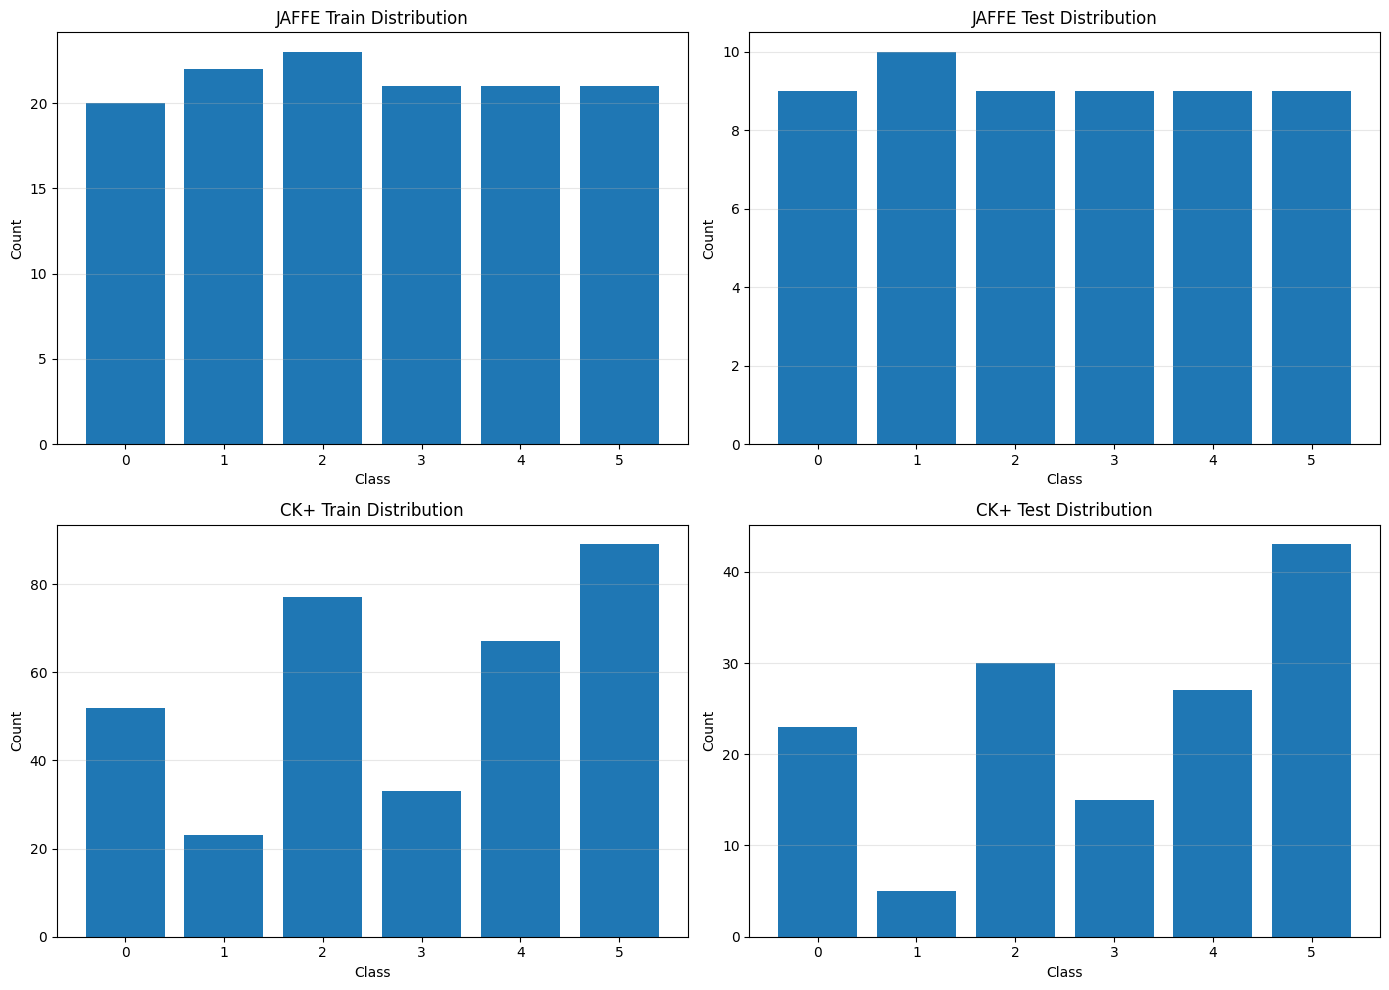

In [ ]:
# Get class distributions
jaffe_train_dist = Counter(jaffe_train_y)
jaffe_test_dist = Counter(jaffe_test_y)
ck_train_dist = Counter(ck_train_y)
ck_test_dist = Counter(ck_test_y)

# Print distributions
print("JAFFE Dataset")
print(f"Train - Total samples: {len(jaffe_train_y)}")
for class_label in sorted(jaffe_train_dist.keys()):
    count = jaffe_train_dist[class_label]
    percentage = (count / len(jaffe_train_y)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

print(f"\nTest - Total samples: {len(jaffe_test_y)}")
for class_label in sorted(jaffe_test_dist.keys()):
    count = jaffe_test_dist[class_label]
    percentage = (count / len(jaffe_test_y)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

print("\n=== CK+ Dataset ===")
print(f"Train - Total samples: {len(ck_train_y)}")
for class_label in sorted(ck_train_dist.keys()):
    count = ck_train_dist[class_label]
    percentage = (count / len(ck_train_y)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

print(f"\nTest - Total samples: {len(ck_test_y)}")
for class_label in sorted(ck_test_dist.keys()):
    count = ck_test_dist[class_label]
    percentage = (count / len(ck_test_y)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# JAFFE Train
axes[0, 0].bar(sorted(jaffe_train_dist.keys()),
               [jaffe_train_dist[k] for k in sorted(jaffe_train_dist.keys())])
axes[0, 0].set_title('JAFFE Train Distribution')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# JAFFE Test
axes[0, 1].bar(sorted(jaffe_test_dist.keys()),
               [jaffe_test_dist[k] for k in sorted(jaffe_test_dist.keys())])
axes[0, 1].set_title('JAFFE Test Distribution')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# CK+ Train
axes[1, 0].bar(sorted(ck_train_dist.keys()),
               [ck_train_dist[k] for k in sorted(ck_train_dist.keys())])
axes[1, 0].set_title('CK+ Train Distribution')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# CK+ Test
axes[1, 1].bar(sorted(ck_test_dist.keys()),
               [ck_test_dist[k] for k in sorted(ck_test_dist.keys())])
axes[1, 1].set_title('CK+ Test Distribution')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
import urllib.request

HAAR_CASCADE_URL = 'https://raw.githubusercontent.com/opencv/opencv/refs/heads/master/data/haarcascades/haarcascade_frontalface_default.xml'
HAAR_CASCADE_FILE = 'haarcascade_frontalface_default.xml'

urllib.request.urlretrieve(HAAR_CASCADE_URL, HAAR_CASCADE_FILE)
face_cascade = cv2.CascadeClassifier(HAAR_CASCADE_FILE)

def detect_face(images):
    face_images = []
    for image in images:
        gray = image.copy().astype(np.uint8)
        face_rect = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

        if len(face_rect) > 0:
            (x, y, w, h) = face_rect[0]
            face_cropped = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face_cropped, (64, 64), interpolation=cv2.INTER_AREA)
            face_images.append(face_resized)
        else:
            face_images.append(gray)

    return np.array(face_images)

In [ ]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def test_classifiers(X_train, y_train, X_test, y_test, dataset_name):
    classifiers = {
        'Random Forest': RandomForestClassifier(n_estimators=500,
                                                max_depth=20,
                                                min_samples_split=2,
                                                min_samples_leaf=4,
                                                bootstrap=False,
                                                random_state=42),
        'SVM (Linear)': SVC(kernel='linear', C=10, probability=True, random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', gamma='scale', C=10, probability=True, random_state=42),
         'KNN (k=3)': KNeighborsClassifier(n_neighbors=3, weights='distance'),
        'KNN (k=5)': KNeighborsClassifier(n_neighbors=5, weights='distance'),
        'KNN (k=7)': KNeighborsClassifier(n_neighbors=7, weights='distance'),
        'Decision Tree': DecisionTreeClassifier(criterion='gini',
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        ),
        'Naive Bayes': GaussianNB(var_smoothing=1e-1)

    }

    results = []
    best_acc = 0
    best_name = ""

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

        results.append({'Classifier': name, 'Accuracy': f"{acc:.4f}", 'F1': f"{f1:.4f}"})

        if acc > best_acc:
            best_acc = acc
            best_name = name

    print(f"\n{dataset_name} Results:")
    print(pd.DataFrame(results).to_string(index=False))
    print(f"Best: {best_name} - {best_acc:.2%}")

    return pd.DataFrame(results), best_name, best_acc


In [ ]:
from skimage.feature import local_binary_pattern

def get_lbp_features(images, P=24, R=3):
    lbp_features = []
    for image in images:
        # LBP algorithm
        lbp = local_binary_pattern(image, P, R, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))

        # Normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        lbp_features.append(hist)
    return np.array(lbp_features)

def get_hog_features(images):
    hog_features = []
    if isinstance(images, np.ndarray) and images.ndim == 2:
        images = [images]

    for image in images:
        features, _ = hog(image, orientations=9, pixels_per_cell=(4, 4),
                         cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)

    return np.array(hog_features)


def get_statistical_features(images, n_regions=4):
    stat_features = []

    if isinstance(images, np.ndarray) and images.ndim == 2:
        images = [images]

    for image in images:
        features = []
        h, w = image.shape

        features.extend([
            np.mean(image),
            np.std(image),
            skew(image.flatten()),
            kurtosis(image.flatten()),
            shannon_entropy(image)
        ])

        region_h = h // n_regions
        region_w = w // n_regions

        for i in range(n_regions):
            for j in range(n_regions):
                region = image[i*region_h:(i+1)*region_h, j*region_w:(j+1)*region_w]
                features.extend([
                    np.mean(region),
                    np.std(region),
                    np.min(region),
                    np.max(region)
                ])

        stat_features.append(features)

    return np.array(stat_features)

def pca(X_train, X_test):
    pca = PCA(n_components=55, whiten=True, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"Explained variance: {pca.explained_variance_ratio_.sum():.2%}")

    return X_train_pca, X_test_pca, pca

def get_gabor_features(images):
    kernels = []
    frequencies = (0.1, 0.2, 0.3, 0.4)
    thetas = (0, np.pi/4, np.pi/2, 3*np.pi/4)

    for freq in frequencies:
        for theta in thetas:
            kernels.append(np.real(gabor_kernel(freq, theta=theta)))

    features = []

    # Extract features per image
    for image in images:
        image_feats = []
        for kernel in kernels:
            # Apply filter
            filtered = ndi.convolve(image, kernel, mode='wrap')

            image_feats.append(filtered.mean())
            image_feats.append(filtered.var())

        features.append(image_feats)

    return np.array(features)


# **RAW data not augmneted, no feature extraction**

In [ ]:
# Detect face
jaffe_train_face_detected_X = detect_face(jaffe_train_X)
jaffe_test_face_detected_X = detect_face(jaffe_test_X)
ck_train_face_detected_X = detect_face(ck_train_X)
ck_test_face_detected_X = detect_face(ck_test_X)

# Prepare raw pixels
raw_X_train_jaffe = jaffe_train_face_detected_X.reshape(jaffe_train_face_detected_X.shape[0], -1)
raw_X_test_jaffe = jaffe_test_face_detected_X.reshape(jaffe_test_face_detected_X.shape[0], -1)
raw_X_train_ck = ck_train_face_detected_X.reshape(ck_train_face_detected_X.shape[0], -1)
raw_X_test_ck = ck_test_face_detected_X.reshape(ck_test_face_detected_X.shape[0], -1)

# Scale data
raw_X_train_jaffe_scaled, raw_X_test_jaffe_scaled = scale_data(raw_X_train_jaffe, raw_X_test_jaffe)
raw_X_train_ck_scaled, raw_X_test_ck_scaled = scale_data(raw_X_train_ck, raw_X_test_ck)

print("Testing baseline (raw pixels)...")
jaffe_raw_results, jaffe_raw_best_name, jaffe_raw_best_acc = test_classifiers(
    raw_X_train_jaffe_scaled, jaffe_train_y,
    raw_X_test_jaffe_scaled, jaffe_test_y, "JAFFE"
)

ck_raw_results, ck_raw_best_name, ck_raw_best_acc = test_classifiers(
    raw_X_train_ck_scaled, ck_train_y,
    raw_X_test_ck_scaled, ck_test_y, "CK+"
)

Testing baseline (raw pixels)...

JAFFE Results:
   Classifier Accuracy     F1
Random Forest   0.5455 0.5567
 SVM (Linear)   0.2727 0.2057
    SVM (RBF)   0.3273 0.2486
    KNN (k=3)   0.3636 0.2984
    KNN (k=5)   0.3455 0.2902
    KNN (k=7)   0.3455 0.2502
Decision Tree   0.3273 0.3454
  Naive Bayes   0.3273 0.2169
Best: Random Forest - 54.55%

CK+ Results:
   Classifier Accuracy     F1
Random Forest   0.6014 0.4860
 SVM (Linear)   0.6853 0.6136
    SVM (RBF)   0.6713 0.6055
    KNN (k=3)   0.5035 0.4497
    KNN (k=5)   0.4406 0.3627
    KNN (k=7)   0.4755 0.3883
Decision Tree   0.4196 0.3480
  Naive Bayes   0.3706 0.2975
Best: SVM (Linear) - 68.53%


**Augmentation on JAFFE**

In [ ]:
def augment_uniform(images, labels, augmentation_ratio=0.3):
    X_augmented = [np.copy(x) for x in images]
    y_augmented = [int(l) for l in labels]

    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Affine(translate_percent=0.05, scale=(0.92, 1.08), rotate=(-4, 4),
                 mode=cv2.BORDER_REPLICATE, p=0.7),
        A.RandomBrightnessContrast(brightness_limit=0.12, contrast_limit=0.12, p=0.7),
        A.GaussNoise(var_limit=(2.0, 20.0), mean=0, p=0.5),
        A.MotionBlur(blur_limit=(3, 5), p=0.2),
        A.CLAHE(clip_limit=2.0, p=0.25),
        A.CoarseDropout(max_holes=1, max_height=12, max_width=12, fill_value=0, p=0.4)
    ], p=1.0)

    imgs = np.asarray(images)
    is_float = np.issubdtype(imgs.dtype, np.floating) and imgs.max() <= 1.0

    print(f"Original distribution: {Counter(labels)}")

    total_augmentations = int(len(images) * augmentation_ratio)

    for _ in range(total_augmentations):
        idx = random.randint(0, len(images) - 1)
        img = images[idx].copy()
        label = labels[idx]

        if img.ndim == 3 and img.shape[-1] == 1:
            img_proc = img[:, :, 0]
        else:
            img_proc = img

        if is_float:
            img_proc = (img_proc * 255.0).astype('uint8')

        aug_img = aug(image=img_proc)['image']

        if not isinstance(aug_img, np.ndarray):
            aug_img = np.array(aug_img)

        if imgs.ndim == 4 and imgs.shape[-1] == 1:
            aug_img = aug_img.reshape(aug_img.shape[0], aug_img.shape[1], 1)

        if is_float:
            aug_img = (aug_img.astype('float32') / 255.0)

        X_augmented.append(aug_img)
        y_augmented.append(int(label))

    X_augmented = np.array(X_augmented)
    y_augmented = np.array(y_augmented, dtype=int)

    if X_augmented.ndim != 3 and X_augmented.ndim != 4:
        X_augmented = X_augmented.reshape(-1, 64, 64)

    print(f"After augmentation (+{augmentation_ratio*100:.0f}%): {len(labels)} → {len(y_augmented)}")
    print(f"New distribution: {Counter(y_augmented)}")

    return X_augmented, y_augmented

In [ ]:
print("Applying augmentation to JAFFE...")
jaffe_train_X_weighted, jaffe_train_y_weighted = augment_uniform(
    jaffe_train_X, jaffe_train_y
)

jaffe_train_face_weighted = detect_face(jaffe_train_X_weighted)
raw_X_train_jaffe_weighted = jaffe_train_face_weighted.reshape(-1, 4096)
raw_X_train_jaffe_weighted_scaled, _ = scale_data(raw_X_train_jaffe_weighted, raw_X_test_jaffe)

print("\nTesting augmented JAFFE...")
jaffe_weighted_results, jaffe_weighted_best, jaffe_weighted_acc = test_classifiers(
    raw_X_train_jaffe_weighted_scaled, jaffe_train_y_weighted,
    raw_X_test_jaffe_scaled, jaffe_test_y, "JAFFE (Augmented)"
)

print(f"\nJAFFE Comparison:")
print(f"  No Augmentation: {jaffe_raw_best_acc:.2%}")
print(f"  With Augmentation: {jaffe_weighted_acc:.2%}")
print(f"  Improvement: {(jaffe_weighted_acc - jaffe_raw_best_acc)*100:+.2f}pp")


Applying augmentation to JAFFE...
Original distribution: Counter({np.int64(2): 23, np.int64(1): 22, np.int64(3): 21, np.int64(4): 21, np.int64(5): 21, np.int64(0): 20})
After augmentation (+30%): 128 → 166
New distribution: Counter({np.int64(2): 32, np.int64(5): 29, np.int64(0): 28, np.int64(4): 27, np.int64(1): 26, np.int64(3): 24})


/tmp/ipython-input-2924585024.py:7: UserWarning: Argument(s) 'mode' are not valid for transform Affine
  A.Affine(translate_percent=0.05, scale=(0.92, 1.08), rotate=(-4, 4),
/tmp/ipython-input-2924585024.py:10: UserWarning: Argument(s) 'var_limit, mean' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(2.0, 20.0), mean=0, p=0.5),
/tmp/ipython-input-2924585024.py:13: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=1, max_height=12, max_width=12, fill_value=0, p=0.4)



Testing augmented JAFFE...

JAFFE (Augmented) Results:
   Classifier Accuracy     F1
Random Forest   0.5636 0.5577
 SVM (Linear)   0.3091 0.2247
    SVM (RBF)   0.3273 0.2712
    KNN (k=3)   0.3818 0.3222
    KNN (k=5)   0.3636 0.2732
    KNN (k=7)   0.3818 0.2909
Decision Tree   0.2727 0.2557
  Naive Bayes   0.1636 0.0851
Best: Random Forest - 56.36%

JAFFE Comparison:
  No Augmentation: 54.55%
  With Augmentation: 56.36%
  Improvement: +1.82pp


# **Augmentation on CK+**

In [ ]:
def augment_smart_balance(images, labels, min_samples_target=None):
    import albumentations as A

    X_aug = [np.copy(x) for x in images]
    y_aug = [int(l) for l in labels]

    counts = Counter(labels)
    if min_samples_target is None:
        median_count = int(np.median(list(counts.values())))
        min_samples_target = int(median_count * 0.75)

    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
                           border_mode=cv2.BORDER_REPLICATE, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
    ])

    imgs = np.asarray(images)

    is_float = False
    if imgs.max() <= 1.0:
        is_float = True
        imgs = (imgs * 255).astype(np.uint8)
    else:
        imgs = imgs.astype(np.uint8)

    for label in sorted(list(set(labels))):
        idxs = np.where(np.array(labels) == label)[0]
        current_count = len(idxs)

        if current_count >= min_samples_target:
            continue

        needed = min_samples_target - current_count
        print(f"Class {label}: Adding {needed} safe augmentations.")

        source_idxs = np.random.choice(idxs, needed, replace=True)

        for src_idx in source_idxs:
            img = imgs[src_idx]

            if img.ndim == 2:
                img = np.expand_dims(img, axis=-1)

            aug_img = aug(image=img)['image']

            if aug_img.shape[-1] == 1:
                aug_img = aug_img[:, :, 0]

            if is_float:
                aug_img = aug_img.astype('float32') / 255.0

            X_aug.append(aug_img)
            y_aug.append(int(label))

    return np.array(X_aug), np.array(y_aug)


In [ ]:
print("Applying augmentation to CK+...")
ck_train_X_weighted, ck_train_y_weighted = augment_smart_balance(
    ck_train_X, ck_train_y
)

ck_train_face_weighted = detect_face(ck_train_X_weighted)
raw_X_train_ck_weighted = ck_train_face_weighted.reshape(-1, 4096)
raw_X_train_ck_weighted_scaled, _ = scale_data(raw_X_train_ck_weighted, raw_X_test_ck)

print("\nTesting augmented CK+...")
ck_weighted_results, ck_weighted_best, ck_weighted_acc = test_classifiers(
    raw_X_train_ck_weighted_scaled, ck_train_y_weighted,
    raw_X_test_ck_scaled, ck_test_y, "CK+ (Augmented)"
)

print("CK+ Comparison:")
print(f"  No Augmentation: {ck_raw_best_acc:.2%}")
print(f"  With Augmentation: {ck_weighted_acc:.2%}")
print(f"  Improvement: {(ck_weighted_acc - ck_raw_best_acc)*100:+.2f}pp")

Applying augmentation to CK+...
Class 1: Adding 21 safe augmentations.
Class 3: Adding 11 safe augmentations.


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)



Testing augmented CK+...

CK+ (Augmented) Results:
   Classifier Accuracy     F1
Random Forest   0.5804 0.4767
 SVM (Linear)   0.7133 0.6840
    SVM (RBF)   0.6294 0.5764
    KNN (k=3)   0.4965 0.4633
    KNN (k=5)   0.4196 0.3529
    KNN (k=7)   0.4476 0.3689
Decision Tree   0.3846 0.3362
  Naive Bayes   0.3427 0.2786
Best: SVM (Linear) - 71.33%
CK+ Comparison:
  No Augmentation: 68.53%
  With Augmentation: 71.33%
  Improvement: +2.80pp


=== JAFFE Dataset (After Augmentation) ===
Train - Total samples: 166
  Class 0: 28 samples (16.9%)
  Class 1: 26 samples (15.7%)
  Class 2: 32 samples (19.3%)
  Class 3: 24 samples (14.5%)
  Class 4: 27 samples (16.3%)
  Class 5: 29 samples (17.5%)

Test - Total samples: 55
  Class 0: 9 samples (16.4%)
  Class 1: 10 samples (18.2%)
  Class 2: 9 samples (16.4%)
  Class 3: 9 samples (16.4%)
  Class 4: 9 samples (16.4%)
  Class 5: 9 samples (16.4%)

=== CK+ Dataset (After Augmentation) ===
Train - Total samples: 373
  Class 0: 52 samples (13.9%)
  Class 1: 44 samples (11.8%)
  Class 2: 77 samples (20.6%)
  Class 3: 44 samples (11.8%)
  Class 4: 67 samples (18.0%)
  Class 5: 89 samples (23.9%)

Test - Total samples: 143
  Class 0: 23 samples (16.1%)
  Class 1: 5 samples (3.5%)
  Class 2: 30 samples (21.0%)
  Class 3: 15 samples (10.5%)
  Class 4: 27 samples (18.9%)
  Class 5: 43 samples (30.1%)


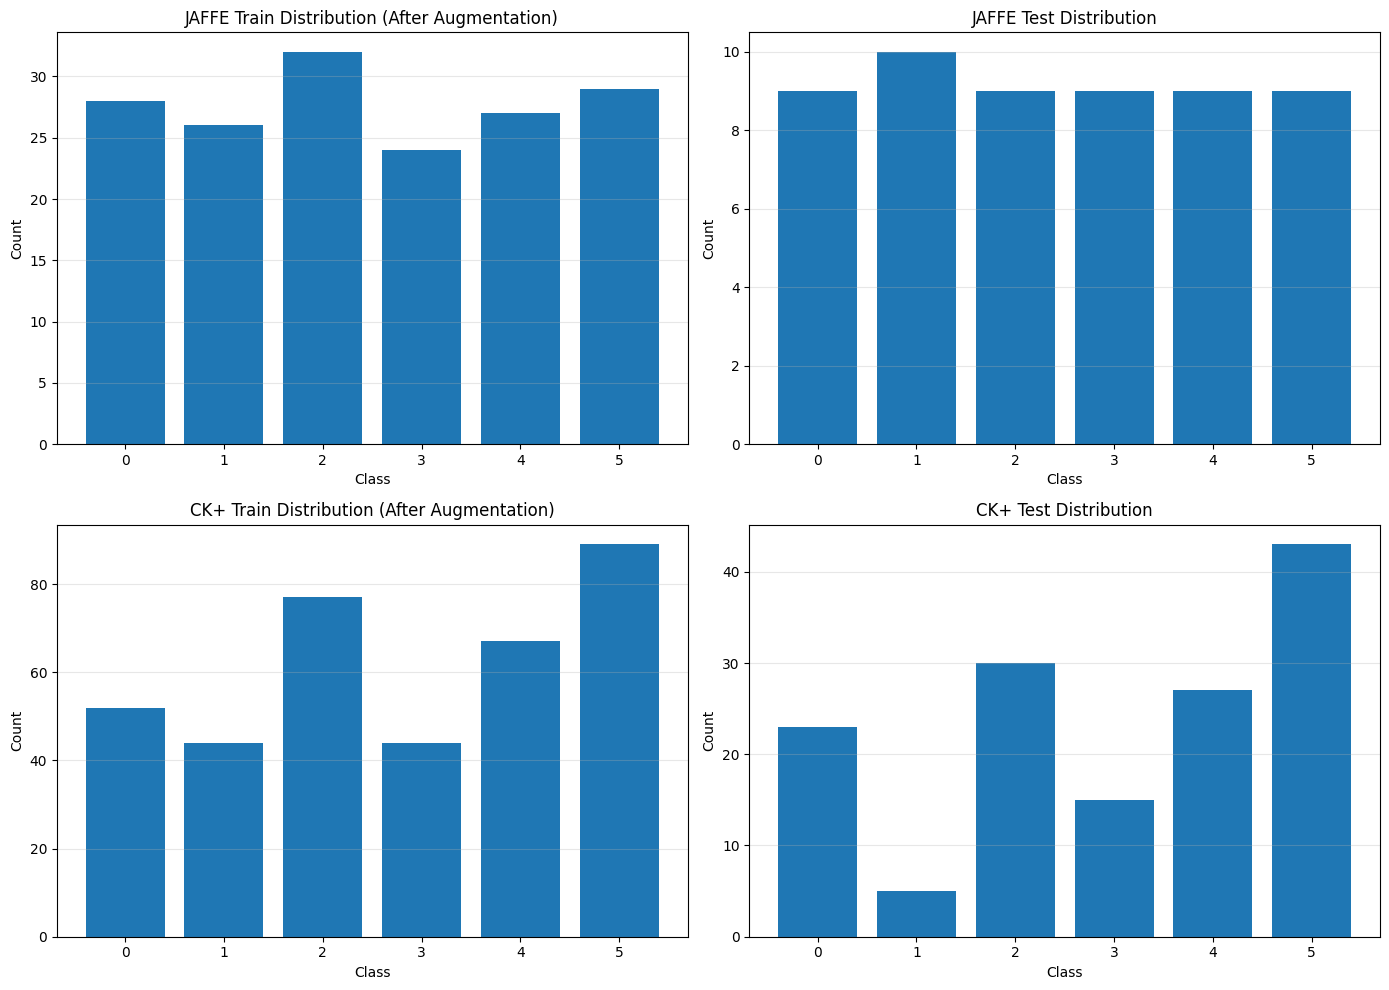

In [ ]:
# Get class distributions
jaffe_train_aug_dist = Counter(jaffe_train_y_weighted)
jaffe_test_dist = Counter(jaffe_test_y)
ck_train_aug_dist = Counter(ck_train_y_weighted)
ck_test_dist = Counter(ck_test_y)

# Print distributions
print("=== JAFFE Dataset (After Augmentation) ===")
print(f"Train - Total samples: {len(jaffe_train_y_weighted)}")
for class_label in sorted(jaffe_train_aug_dist.keys()):
    count = jaffe_train_aug_dist[class_label]
    percentage = (count / len(jaffe_train_y_weighted)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

print(f"\nTest - Total samples: {len(jaffe_test_y)}")
for class_label in sorted(jaffe_test_dist.keys()):
    count = jaffe_test_dist[class_label]
    percentage = (count / len(jaffe_test_y)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

print("\n=== CK+ Dataset (After Augmentation) ===")
print(f"Train - Total samples: {len(ck_train_y_weighted)}")
for class_label in sorted(ck_train_aug_dist.keys()):
    count = ck_train_aug_dist[class_label]
    percentage = (count / len(ck_train_y_weighted)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

print(f"\nTest - Total samples: {len(ck_test_y)}")
for class_label in sorted(ck_test_dist.keys()):
    count = ck_test_dist[class_label]
    percentage = (count / len(ck_test_y)) * 100
    print(f"  Class {class_label}: {count} samples ({percentage:.1f}%)")

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# JAFFE Train (Augmented)
axes[0, 0].bar(sorted(jaffe_train_aug_dist.keys()),
               [jaffe_train_aug_dist[k] for k in sorted(jaffe_train_aug_dist.keys())])
axes[0, 0].set_title('JAFFE Train Distribution (After Augmentation)')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# JAFFE Test
axes[0, 1].bar(sorted(jaffe_test_dist.keys()),
               [jaffe_test_dist[k] for k in sorted(jaffe_test_dist.keys())])
axes[0, 1].set_title('JAFFE Test Distribution')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# CK+ Train (Augmented)
axes[1, 0].bar(sorted(ck_train_aug_dist.keys()),
               [ck_train_aug_dist[k] for k in sorted(ck_train_aug_dist.keys())])
axes[1, 0].set_title('CK+ Train Distribution (After Augmentation)')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# CK+ Test
axes[1, 1].bar(sorted(ck_test_dist.keys()),
               [ck_test_dist[k] for k in sorted(ck_test_dist.keys())])
axes[1, 1].set_title('CK+ Test Distribution')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


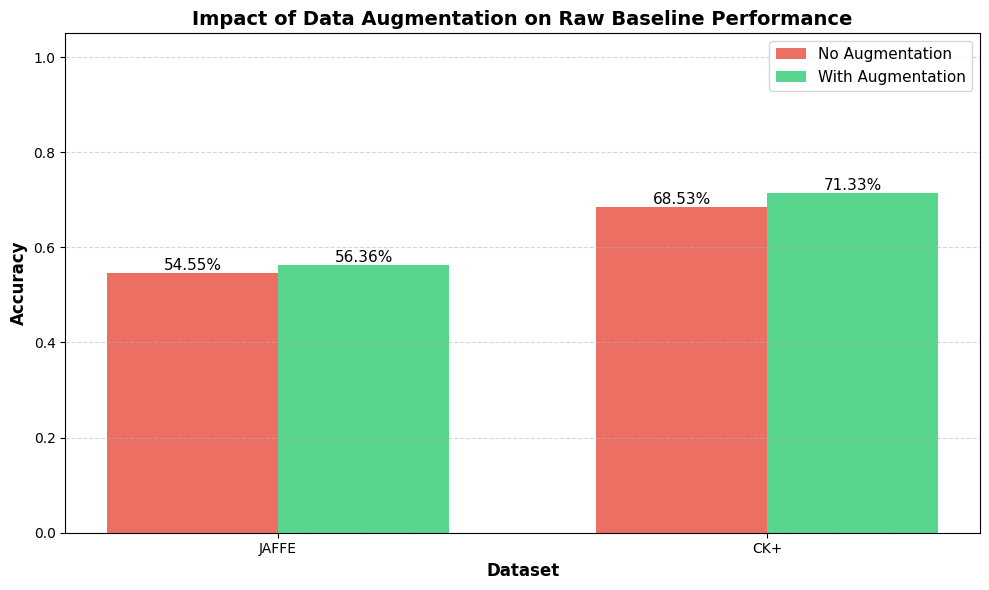

In [ ]:
# 1. Augmentation Effect Visualization: Side-by-side comparison
import matplotlib.pyplot as plt
import numpy as np

# Extract baseline scores
baseline_no_aug_jaffe = experiment_results["Raw (Baseline) - No Aug"]["JAFFE"]["best_accuracy"]
baseline_aug_jaffe = experiment_results["Raw (Baseline) - Augmented"]["JAFFE"]["best_accuracy"]
baseline_no_aug_ck = experiment_results["Raw (Baseline) - No Aug"]["CK+"]["best_accuracy"]
baseline_aug_ck = experiment_results["Raw (Baseline) - Augmented"]["CK+"]["best_accuracy"]

datasets = ['JAFFE', 'CK+']
no_aug_scores = [baseline_no_aug_jaffe, baseline_no_aug_ck]
aug_scores = [baseline_aug_jaffe, baseline_aug_ck]

x = np.arange(len(datasets))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, no_aug_scores, width, label='No Augmentation', alpha=0.8, color='#e74c3c')
bars2 = ax.bar(x + width/2, aug_scores, width, label='With Augmentation', alpha=0.8, color='#2ecc71')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom', fontsize=11)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom', fontsize=11)

ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Impact of Data Augmentation on Raw Baseline Performance', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend(fontsize=11)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


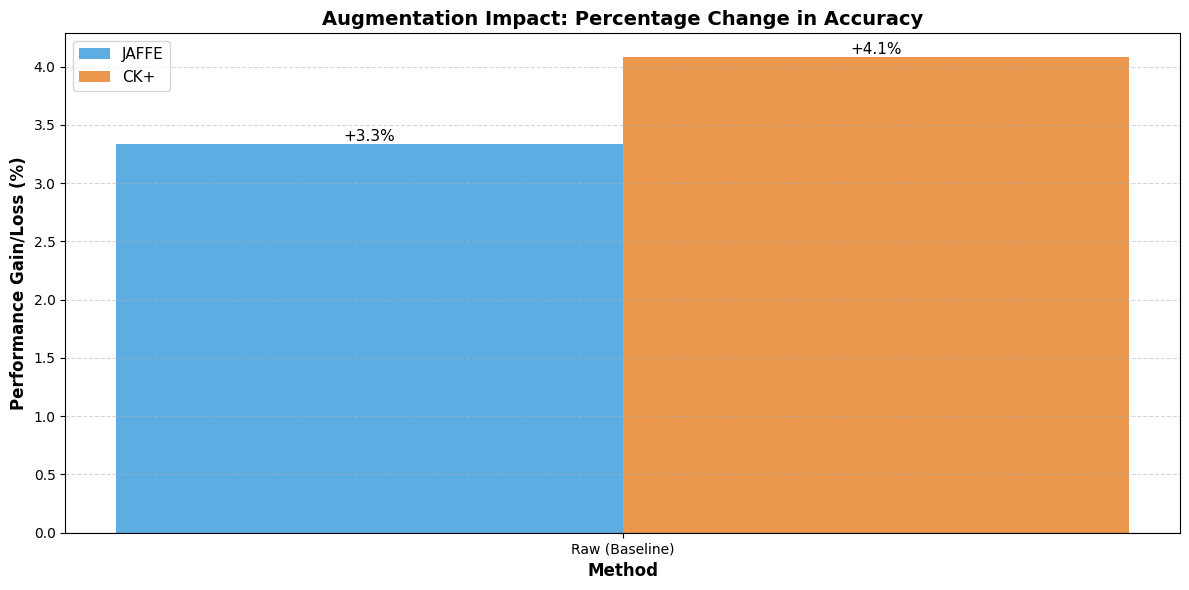


AUGMENTATION IMPACT SUMMARY
JAFFE Dataset:
  No Augmentation:   54.55%
  With Augmentation: 56.36%
  Improvement:       +3.33%
------------------------------------------------------------
CK+ Dataset:
  No Augmentation:   68.53%
  With Augmentation: 71.33%
  Improvement:       +4.08%


In [ ]:
# Calculate percentage improvements
augmentation_impact = {
    'Raw (Baseline)': {
        'JAFFE': ((baseline_aug_jaffe - baseline_no_aug_jaffe) / baseline_no_aug_jaffe) * 100,
        'CK+': ((baseline_aug_ck - baseline_no_aug_ck) / baseline_no_aug_ck) * 100
    }
}

methods_list = ['Raw (Baseline)']
jaffe_gains = [augmentation_impact['Raw (Baseline)']['JAFFE']]
ck_gains = [augmentation_impact['Raw (Baseline)']['CK+']]

x = np.arange(len(methods_list))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, jaffe_gains, width, label='JAFFE', alpha=0.8, color='#3498db')
bars2 = ax.bar(x + width/2, ck_gains, width, label='CK+', alpha=0.8, color='#e67e22')

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=11)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=11)

ax.set_xlabel('Method', fontsize=12, fontweight='bold')
ax.set_ylabel('Performance Gain/Loss (%)', fontsize=12, fontweight='bold')
ax.set_title('Augmentation Impact: Percentage Change in Accuracy', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods_list)
ax.legend(fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("AUGMENTATION IMPACT SUMMARY")
print("="*60)
print(f"JAFFE Dataset:")
print(f"  No Augmentation:   {baseline_no_aug_jaffe:.2%}")
print(f"  With Augmentation: {baseline_aug_jaffe:.2%}")
print(f"  Improvement:       {jaffe_gains[0]:+.2f}%")
print("-"*60)
print(f"CK+ Dataset:")
print(f"  No Augmentation:   {baseline_no_aug_ck:.2%}")
print(f"  With Augmentation: {baseline_aug_ck:.2%}")
print(f"  Improvement:       {ck_gains[0]:+.2f}%")
print("="*60)

# **Extracting features from JAFFE**
Working with augmented JAFFE and augmented CK+

In [ ]:
experiment_results = {}

print("Testing baseline (raw pixels)...")

experiment_results["Raw (Baseline) - No Aug"] = {
    "JAFFE": {
        "all_results": jaffe_raw_results,
        "best_model": jaffe_raw_best_name,
        "best_accuracy": jaffe_raw_best_acc
    },
    "CK+": {
        "all_results": ck_raw_results,
        "best_model": ck_raw_best_name,
        "best_accuracy": ck_raw_best_acc
    }
}

experiment_results["Raw (Baseline) - Augmented"] = {
    "JAFFE": {
        "all_results": jaffe_weighted_results,
        "best_model": jaffe_weighted_best,
        "best_accuracy": jaffe_weighted_acc
    },
    "CK+": {
        "all_results": ck_weighted_results,
        "best_model": ck_weighted_best,
        "best_accuracy": ck_weighted_acc
    }
}

print("Results dictionary initialized.")


Testing baseline (raw pixels)...
Results dictionary initialized.


# HOG

In [ ]:
print("Extracting HOG features...")

# JAFFE with augmentation
hog_train_jaffe = get_hog_features(jaffe_train_face_weighted)
hog_test_jaffe = get_hog_features(jaffe_test_face_detected_X)
hog_train_jaffe = hog_train_jaffe.reshape(hog_train_jaffe.shape[0], -1)
hog_test_jaffe = hog_test_jaffe.reshape(hog_test_jaffe.shape[0], -1)

hog_train_jaffe_scaled, hog_test_jaffe_scaled = scale_data(hog_train_jaffe, hog_test_jaffe)

# CK+ with augmentation
hog_train_ck = get_hog_features(ck_train_face_weighted)
hog_test_ck = get_hog_features(ck_test_face_detected_X)
hog_train_ck = hog_train_ck.reshape(hog_train_ck.shape[0], -1)
hog_test_ck = hog_test_ck.reshape(hog_test_ck.shape[0], -1)

hog_train_ck_scaled, hog_test_ck_scaled = scale_data(hog_train_ck, hog_test_ck)

print("\nTesting HOG features...")
jaffe_hog_results, jaffe_hog_best, jaffe_hog_acc = test_classifiers(
    hog_train_jaffe_scaled, jaffe_train_y_weighted,
    hog_test_jaffe_scaled, jaffe_test_y, "JAFFE (HOG)"
)

ck_hog_results, ck_hog_best, ck_hog_acc = test_classifiers(
    hog_train_ck_scaled, ck_train_y_weighted,
    hog_test_ck_scaled, ck_test_y, "CK+ (HOG)"
)

print(f"\nJAFFE - Raw (Augmented) vs HOG: {jaffe_weighted_acc:.2%} vs {jaffe_hog_acc:.2%}")
print(f"CK+ - Raw (Augmented) vs HOG: {ck_weighted_acc:.2%} vs {ck_hog_acc:.2%}")

# Save to dictionary
experiment_results["HOG"] = {
    "JAFFE": {
        "all_results": jaffe_hog_results,
        "best_model": jaffe_hog_best,
        "best_accuracy": jaffe_hog_acc
    },
    "CK+": {
        "all_results": ck_hog_results,
        "best_model": ck_hog_best,
        "best_accuracy": ck_hog_acc
    }
}


Extracting HOG features...

Testing HOG features...

JAFFE (HOG) Results:
   Classifier Accuracy     F1
Random Forest   0.6545 0.6491
 SVM (Linear)   0.7273 0.7397
    SVM (RBF)   0.7455 0.7319
    KNN (k=3)   0.4000 0.3597
    KNN (k=5)   0.4000 0.3625
    KNN (k=7)   0.3818 0.3376
Decision Tree   0.3636 0.3643
  Naive Bayes   0.5091 0.5232
Best: SVM (RBF) - 74.55%

CK+ (HOG) Results:
   Classifier Accuracy     F1
Random Forest   0.6993 0.5971
 SVM (Linear)   0.7762 0.7788
    SVM (RBF)   0.7483 0.6462
    KNN (k=3)   0.5734 0.4931
    KNN (k=5)   0.5594 0.4589
    KNN (k=7)   0.6224 0.5350
Decision Tree   0.4266 0.3653
  Naive Bayes   0.7063 0.6544
Best: SVM (Linear) - 77.62%

JAFFE - Raw (Augmented) vs HOG: 56.36% vs 74.55%
CK+ - Raw (Augmented) vs HOG: 71.33% vs 77.62%


# Statistical Features

In [ ]:
print("Extracting statistical features...")

# Extract features
stat_train_jaffe = get_statistical_features(jaffe_train_face_weighted)
stat_test_jaffe = get_statistical_features(jaffe_test_face_detected_X)
stat_train_ck = get_statistical_features(ck_train_face_weighted)
stat_test_ck = get_statistical_features(ck_test_face_detected_X)

# Scale the data
stat_train_jaffe_scaled, stat_test_jaffe_scaled = scale_data(stat_train_jaffe, stat_test_jaffe)
stat_train_ck_scaled, stat_test_ck_scaled = scale_data(stat_train_ck, stat_test_ck)

print("\nTesting statistical features...")

# Test Classifiers for JAFFE
jaffe_stat_results, jaffe_stat_best, jaffe_stat_acc = test_classifiers(
    stat_train_jaffe_scaled, jaffe_train_y_weighted,
    stat_test_jaffe_scaled, jaffe_test_y, "JAFFE (Statistical)"
)

# Test Classifiers for CK+
ck_stat_results, ck_stat_best, ck_stat_acc = test_classifiers(
    stat_train_ck_scaled, ck_train_y_weighted,
    stat_test_ck_scaled, ck_test_y, "CK+ (Statistical)"
)

print(f"\nJAFFE - Raw (Augmented) vs Statistical: {jaffe_weighted_acc:.2%} vs {jaffe_stat_acc:.2%}")
print(f"CK+ - Raw (Augmented) vs Statistical: {ck_weighted_acc:.2%} vs {ck_stat_acc:.2%}")

# Save to dictionary
experiment_results["Statistical"] = {
    "JAFFE": {
        "all_results": jaffe_stat_results,
        "best_model": jaffe_stat_best,
        "best_accuracy": jaffe_stat_acc
    },
    "CK+": {
        "all_results": ck_stat_results,
        "best_model": ck_stat_best,
        "best_accuracy": ck_stat_acc
    }
}


Extracting statistical features...

Testing statistical features...

JAFFE (Statistical) Results:
   Classifier Accuracy     F1
Random Forest   0.3636 0.2909
 SVM (Linear)   0.3091 0.3018
    SVM (RBF)   0.2909 0.2605
    KNN (k=3)   0.3091 0.2911
    KNN (k=5)   0.3636 0.3330
    KNN (k=7)   0.3091 0.2869
Decision Tree   0.1636 0.0887
  Naive Bayes   0.2545 0.2146
Best: Random Forest - 36.36%

CK+ (Statistical) Results:
   Classifier Accuracy     F1
Random Forest   0.5245 0.4216
 SVM (Linear)   0.6154 0.5762
    SVM (RBF)   0.6014 0.5394
    KNN (k=3)   0.4615 0.4102
    KNN (k=5)   0.4476 0.3802
    KNN (k=7)   0.4685 0.4051
Decision Tree   0.4196 0.3483
  Naive Bayes   0.3147 0.2672
Best: SVM (Linear) - 61.54%

JAFFE - Raw (Augmented) vs Statistical: 56.36% vs 36.36%
CK+ - Raw (Augmented) vs Statistical: 71.33% vs 61.54%


# LBP

In [ ]:
print("Extracting LBP features...")

# Extract features for JAFFE (using the weighted/augmented training set)
lbp_train_jaffe = get_lbp_features(jaffe_train_face_weighted)
lbp_test_jaffe = get_lbp_features(jaffe_test_face_detected_X)

# Scale JAFFE data
lbp_train_jaffe_scaled, lbp_test_jaffe_scaled = scale_data(lbp_train_jaffe, lbp_test_jaffe)

# Extract features for CK+
lbp_train_ck = get_lbp_features(ck_train_face_weighted)
lbp_test_ck = get_lbp_features(ck_test_face_detected_X)

# Scale CK+ data
lbp_train_ck_scaled, lbp_test_ck_scaled = scale_data(lbp_train_ck, lbp_test_ck)

print("\nTesting LBP features...")

# Test Classifiers for JAFFE
jaffe_lbp_results, jaffe_lbp_best, jaffe_lbp_acc = test_classifiers(
    lbp_train_jaffe_scaled, jaffe_train_y_weighted,
    lbp_test_jaffe_scaled, jaffe_test_y, "JAFFE (LBP)"
)

# Test Classifiers for CK+
ck_lbp_results, ck_lbp_best, ck_lbp_acc = test_classifiers(
    lbp_train_ck_scaled, ck_train_y_weighted,
    lbp_test_ck_scaled, ck_test_y, "CK+ (LBP)"
)

# Print Comparisons (Raw vs LBP)
print(f"\nJAFFE - Raw (Augmented) vs LBP: {jaffe_weighted_acc:.2%} vs {jaffe_lbp_acc:.2%}")
print(f"CK+ - Raw (Augmented) vs LBP: {ck_weighted_acc:.2%} vs {ck_lbp_acc:.2%}")

# Save to dictionary
experiment_results["LBP"] = {
    "JAFFE": {
        "all_results": jaffe_lbp_results,
        "best_model": jaffe_lbp_best,
        "best_accuracy": jaffe_lbp_acc
    },
    "CK+": {
        "all_results": ck_lbp_results,
        "best_model": ck_lbp_best,
        "best_accuracy": ck_lbp_acc
    }
}


Extracting LBP features...

Testing LBP features...

JAFFE (LBP) Results:
   Classifier Accuracy     F1
Random Forest   0.1273 0.1170
 SVM (Linear)   0.2364 0.1990
    SVM (RBF)   0.1636 0.1481
    KNN (k=3)   0.1636 0.1551
    KNN (k=5)   0.2182 0.2117
    KNN (k=7)   0.2364 0.2349
Decision Tree   0.0545 0.0440
  Naive Bayes   0.1636 0.0747
Best: SVM (Linear) - 23.64%

CK+ (LBP) Results:
   Classifier Accuracy     F1
Random Forest   0.4336 0.2888
 SVM (Linear)   0.2867 0.2443
    SVM (RBF)   0.3986 0.3201
    KNN (k=3)   0.3986 0.3524
    KNN (k=5)   0.3636 0.2971
    KNN (k=7)   0.3636 0.2983
Decision Tree   0.2517 0.2167
  Naive Bayes   0.3077 0.2133
Best: Random Forest - 43.36%

JAFFE - Raw (Augmented) vs LBP: 56.36% vs 23.64%
CK+ - Raw (Augmented) vs LBP: 71.33% vs 43.36%


# PCA

In [ ]:
print("Extracting PCA (Eigenfaces) features...")

# Prepare Data
jaffe_train_flat_aug = jaffe_train_face_weighted.reshape(jaffe_train_face_weighted.shape[0], -1)
ck_train_flat_aug = ck_train_face_weighted.reshape(ck_train_face_weighted.shape[0], -1)

# Apply PCA
print("Applying PCA to JAFFE...")
pca_train_jaffe, pca_test_jaffe, _ = pca(jaffe_train_flat_aug, raw_X_test_jaffe)

print("Applying PCA to CK+...")
pca_train_ck, pca_test_ck, _ = pca(ck_train_flat_aug, raw_X_test_ck)

print("\nTesting PCA features...")

# Test Classifiers for JAFFE
jaffe_pca_results, jaffe_pca_best, jaffe_pca_acc = test_classifiers(
    pca_train_jaffe, jaffe_train_y_weighted,
    pca_test_jaffe, jaffe_test_y, "JAFFE (PCA)"
)

# Test Classifiers for CK+
ck_pca_results, ck_pca_best, ck_pca_acc = test_classifiers(
    pca_train_ck, ck_train_y_weighted,
    pca_test_ck, ck_test_y, "CK+ (PCA)"
)

# Print Comparisons (Raw vs PCA)
print(f"\nJAFFE - Raw (Augmented) vs PCA: {jaffe_weighted_acc:.2%} vs {jaffe_pca_acc:.2%}")
print(f"CK+ - Raw (Augmented) vs PCA: {ck_weighted_acc:.2%} vs {ck_pca_acc:.2%}")

# Save to dictionary
experiment_results["PCA (Eigenfaces)"] = {
    "JAFFE": {
        "all_results": jaffe_pca_results,
        "best_model": jaffe_pca_best,
        "best_accuracy": jaffe_pca_acc
    },
    "CK+": {
        "all_results": ck_pca_results,
        "best_model": ck_pca_best,
        "best_accuracy": ck_pca_acc
    }
}


Extracting PCA (Eigenfaces) features...
Applying PCA to JAFFE...
Explained variance: 93.41%
Applying PCA to CK+...
Explained variance: 92.72%

Testing PCA features...

JAFFE (PCA) Results:
   Classifier Accuracy     F1
Random Forest   0.4000 0.3863
 SVM (Linear)   0.3273 0.2678
    SVM (RBF)   0.2909 0.1773
    KNN (k=3)   0.3091 0.2022
    KNN (k=5)   0.3091 0.2146
    KNN (k=7)   0.2909 0.1956
Decision Tree   0.2909 0.2296
  Naive Bayes   0.3455 0.3159
Best: Random Forest - 40.00%

CK+ (PCA) Results:
   Classifier Accuracy     F1
Random Forest   0.6154 0.5173
 SVM (Linear)   0.6154 0.5847
    SVM (RBF)   0.6783 0.6298
    KNN (k=3)   0.5035 0.4419
    KNN (k=5)   0.4685 0.3780
    KNN (k=7)   0.4755 0.3818
Decision Tree   0.4266 0.3588
  Naive Bayes   0.5105 0.4654
Best: SVM (RBF) - 67.83%

JAFFE - Raw (Augmented) vs PCA: 56.36% vs 40.00%
CK+ - Raw (Augmented) vs PCA: 71.33% vs 67.83%


# GABOR

In [ ]:
print("Extracting Gabor features...")

# Extract features for JAFFE (Augmented)
gabor_train_jaffe = get_gabor_features(jaffe_train_face_weighted)
gabor_test_jaffe = get_gabor_features(jaffe_test_face_detected_X)

# Scale JAFFE data
gabor_train_jaffe_scaled, gabor_test_jaffe_scaled = scale_data(gabor_train_jaffe, gabor_test_jaffe)

# Extract features for CK+
gabor_train_ck = get_gabor_features(ck_train_face_weighted)
gabor_test_ck = get_gabor_features(ck_test_face_detected_X)

# Scale CK+ data
gabor_train_ck_scaled, gabor_test_ck_scaled = scale_data(gabor_train_ck, gabor_test_ck)

print("\nTesting Gabor features...")

# Test Classifiers for JAFFE
jaffe_gabor_results, jaffe_gabor_best, jaffe_gabor_acc = test_classifiers(
    gabor_train_jaffe_scaled, jaffe_train_y_weighted,
    gabor_test_jaffe_scaled, jaffe_test_y, "JAFFE (Gabor)"
)

# Test Classifiers for CK+
ck_gabor_results, ck_gabor_best, ck_gabor_acc = test_classifiers(
    gabor_train_ck_scaled, ck_train_y_weighted,
    gabor_test_ck_scaled, ck_test_y, "CK+ (Gabor)"
)

# Print Comparisons (Raw vs Gabor)
print(f"\nJAFFE - Raw (Augmented) vs Gabor: {jaffe_weighted_acc:.2%} vs {jaffe_gabor_acc:.2%}")
print(f"CK+ - Raw (Augmented) vs Gabor: {ck_weighted_acc:.2%} vs {ck_gabor_acc:.2%}")

# Save to dictionary
experiment_results["Gabor"] = {
    "JAFFE": {
        "all_results": jaffe_gabor_results,
        "best_model": jaffe_gabor_best,
        "best_accuracy": jaffe_gabor_acc
    },
    "CK+": {
        "all_results": ck_gabor_results,
        "best_model": ck_gabor_best,
        "best_accuracy": ck_gabor_acc
    }
}


Extracting Gabor features...

Testing Gabor features...

JAFFE (Gabor) Results:
   Classifier Accuracy     F1
Random Forest   0.3273 0.3090
 SVM (Linear)   0.3455 0.3219
    SVM (RBF)   0.3636 0.3550
    KNN (k=3)   0.2364 0.2343
    KNN (k=5)   0.2727 0.2600
    KNN (k=7)   0.2909 0.2682
Decision Tree   0.2727 0.2388
  Naive Bayes   0.1636 0.0469
Best: SVM (RBF) - 36.36%

CK+ (Gabor) Results:
   Classifier Accuracy     F1
Random Forest   0.4266 0.3520
 SVM (Linear)   0.4406 0.3639
    SVM (RBF)   0.4615 0.4041
    KNN (k=3)   0.3846 0.3612
    KNN (k=5)   0.4266 0.4086
    KNN (k=7)   0.4266 0.3761
Decision Tree   0.3147 0.2967
  Naive Bayes   0.3077 0.2672
Best: SVM (RBF) - 46.15%

JAFFE - Raw (Augmented) vs Gabor: 56.36% vs 36.36%
CK+ - Raw (Augmented) vs Gabor: 71.33% vs 46.15%


**Combinations**

In [ ]:
print("Testing Feature Combinations...")

smote = SMOTE(random_state=42)

# HOG + SMOTE
print("\n[1. HOG + SMOTE]")
ck_hog_smote, ck_y_hog_smote = smote.fit_resample(hog_train_ck_scaled, ck_train_y_weighted)

ck_hog_smote_results, ck_hog_smote_best, ck_hog_smote_acc = test_classifiers(ck_hog_smote, ck_y_hog_smote, hog_test_ck_scaled, ck_test_y, "CK+ (HOG Aug+SMOTE)")

experiment_results["HOG + SMOTE"] = {
    "JAFFE": {
        "all_results": jaffe_hog_results,
        "best_model": jaffe_hog_best,
        "best_accuracy": jaffe_hog_acc
    },
    "CK+": {
        "all_results": ck_hog_smote_results,
        "best_model": ck_hog_smote_best,
        "best_accuracy": ck_hog_smote_acc
    }
}

# HOG + LBP
print("\n[2. HOG + LBP]")
jaffe_hl_train = np.concatenate([hog_train_jaffe_scaled, lbp_train_jaffe_scaled], axis=1)
jaffe_hl_test = np.concatenate([hog_test_jaffe_scaled, lbp_test_jaffe_scaled], axis=1)

ck_hl_train = np.concatenate([hog_train_ck_scaled, lbp_train_ck_scaled], axis=1)
ck_hl_test = np.concatenate([hog_test_ck_scaled, lbp_test_ck_scaled], axis=1)

jaffe_hl_results, jaffe_hl_best, jaffe_hl_acc = test_classifiers(jaffe_hl_train, jaffe_train_y_weighted, jaffe_hl_test, jaffe_test_y, "JAFFE (HOG+LBP Aug)")
ck_hl_results, ck_hl_best, ck_hl_acc = test_classifiers(ck_hl_train, ck_train_y_weighted, ck_hl_test, ck_test_y, "CK+ (HOG+LBP Aug)")

print(f"JAFFE - HOG+LBP Aug: {jaffe_hl_acc:.2%}")
print(f"CK+ - HOG+LBP Aug: {ck_hl_acc:.2%}")

experiment_results["HOG + LBP"] = {
    "JAFFE": {
        "all_results": jaffe_hl_results,
        "best_model": jaffe_hl_best,
        "best_accuracy": jaffe_hl_acc
    },
    "CK+": {
        "all_results": ck_hl_results,
        "best_model": ck_hl_best,
        "best_accuracy": ck_hl_acc
    }
}

# HOG + LBP + PCA
print("\n[3. HOG + LBP + PCA]")
pca_hl_jaffe = PCA(n_components=0.95, whiten=True, random_state=42)
jaffe_hlp_train = pca_hl_jaffe.fit_transform(jaffe_hl_train)
jaffe_hlp_test = pca_hl_jaffe.transform(jaffe_hl_test)

pca_hl_ck = PCA(n_components=0.95, whiten=True, random_state=42)
ck_hlp_train = pca_hl_ck.fit_transform(ck_hl_train)
ck_hlp_test = pca_hl_ck.transform(ck_hl_test)

jaffe_hlp_results, jaffe_hlp_best, jaffe_hlp_acc = test_classifiers(jaffe_hlp_train, jaffe_train_y_weighted, jaffe_hlp_test, jaffe_test_y, "JAFFE (HOG+LBP+PCA Aug)")
ck_hlp_results, ck_hlp_best, ck_hlp_acc = test_classifiers(ck_hlp_train, ck_train_y_weighted, ck_hlp_test, ck_test_y, "CK+ (HOG+LBP+PCA Aug)")

print(f"JAFFE - HOG+LBP+PCA Aug: {jaffe_hlp_acc:.2%}")
print(f"CK+ - HOG+LBP+PCA Aug: {ck_hlp_acc:.2%}")

experiment_results["HOG + LBP + PCA"] = {
    "JAFFE": {
        "all_results": jaffe_hlp_results,
        "best_model": jaffe_hlp_best,
        "best_accuracy": jaffe_hlp_acc
    },
    "CK+": {
        "all_results": ck_hlp_results,
        "best_model": ck_hlp_best,
        "best_accuracy": ck_hlp_acc
    }
}

# HOG + Gabor
print("\n[4. HOG + Gabor]")
jaffe_hg_train = np.concatenate([hog_train_jaffe_scaled, gabor_train_jaffe_scaled], axis=1)
jaffe_hg_test = np.concatenate([hog_test_jaffe_scaled, gabor_test_jaffe_scaled], axis=1)

ck_hg_train = np.concatenate([hog_train_ck_scaled, gabor_train_ck_scaled], axis=1)
ck_hg_test = np.concatenate([hog_test_ck_scaled, gabor_test_ck_scaled], axis=1)

jaffe_hg_results, jaffe_hg_best, jaffe_hg_acc = test_classifiers(jaffe_hg_train, jaffe_train_y_weighted, jaffe_hg_test, jaffe_test_y, "JAFFE (HOG+Gabor Aug)")
ck_hg_results, ck_hg_best, ck_hg_acc = test_classifiers(ck_hg_train, ck_train_y_weighted, ck_hg_test, ck_test_y, "CK+ (HOG+Gabor Aug)")

print(f"JAFFE - HOG+Gabor Aug: {jaffe_hg_acc:.2%}")
print(f"CK+ - HOG+Gabor Aug: {ck_hg_acc:.2%}")

experiment_results["HOG + Gabor"] = {
    "JAFFE": {
        "all_results": jaffe_hg_results,
        "best_model": jaffe_hg_best,
        "best_accuracy": jaffe_hg_acc
    },
    "CK+": {
        "all_results": ck_hg_results,
        "best_model": ck_hg_best,
        "best_accuracy": ck_hg_acc
    }
}

# HOG + Gabor + PCA
print("\n[5. HOG + Gabor + PCA]")
pca_hg_jaffe = PCA(n_components=0.95, whiten=True, random_state=42)
jaffe_hgp_train = pca_hg_jaffe.fit_transform(jaffe_hg_train)
jaffe_hgp_test = pca_hg_jaffe.transform(jaffe_hg_test)

pca_hg_ck = PCA(n_components=0.95, whiten=True, random_state=42)
ck_hgp_train = pca_hg_ck.fit_transform(ck_hg_train)
ck_hgp_test = pca_hg_ck.transform(ck_hg_test)

jaffe_hgp_results, jaffe_hgp_best, jaffe_hgp_acc = test_classifiers(jaffe_hgp_train, jaffe_train_y_weighted, jaffe_hgp_test, jaffe_test_y, "JAFFE (HOG+Gabor+PCA Aug)")
ck_hgp_results, ck_hgp_best, ck_hgp_acc = test_classifiers(ck_hgp_train, ck_train_y_weighted, ck_hgp_test, ck_test_y, "CK+ (HOG+Gabor+PCA Aug)")

print(f"JAFFE - HOG+Gabor+PCA Aug: {jaffe_hgp_acc:.2%}")
print(f"CK+ - HOG+Gabor+PCA Aug: {ck_hgp_acc:.2%}")

experiment_results["HOG + Gabor + PCA"] = {
    "JAFFE": {
        "all_results": jaffe_hgp_results,
        "best_model": jaffe_hgp_best,
        "best_accuracy": jaffe_hgp_acc
    },
    "CK+": {
        "all_results": ck_hgp_results,
        "best_model": ck_hgp_best,
        "best_accuracy": ck_hgp_acc
    }
}

# HOG + PCA
print("\n[6. HOG + PCA]")
pca_h_jaffe = PCA(n_components=0.95, whiten=True, random_state=42)
jaffe_hp_train = pca_h_jaffe.fit_transform(hog_train_jaffe_scaled)
jaffe_hp_test = pca_h_jaffe.transform(hog_test_jaffe_scaled)

pca_h_ck = PCA(n_components=0.95, whiten=True, random_state=42)
ck_hp_train = pca_h_ck.fit_transform(hog_train_ck_scaled)
ck_hp_test = pca_h_ck.transform(hog_test_ck_scaled)

jaffe_hp_results, jaffe_hp_best, jaffe_hp_acc = test_classifiers(jaffe_hp_train, jaffe_train_y_weighted, jaffe_hp_test, jaffe_test_y, "JAFFE (HOG+PCA Aug)")
ck_hp_results, ck_hp_best, ck_hp_acc = test_classifiers(ck_hp_train, ck_train_y_weighted, ck_hp_test, ck_test_y, "CK+ (HOG+PCA Aug)")

print(f"JAFFE - HOG+PCA Aug: {jaffe_hp_acc:.2%}")
print(f"CK+ - HOG+PCA Aug: {ck_hp_acc:.2%}")

experiment_results["HOG + PCA"] = {
    "JAFFE": {
        "all_results": jaffe_hp_results,
        "best_model": jaffe_hp_best,
        "best_accuracy": jaffe_hp_acc
    },
    "CK+": {
        "all_results": ck_hp_results,
        "best_model": ck_hp_best,
        "best_accuracy": ck_hp_acc
    }
}

# HOG + Statistical
print("\n[7. HOG + Statistical]")
jaffe_hs_train = np.concatenate([hog_train_jaffe_scaled, stat_train_jaffe_scaled], axis=1)
jaffe_hs_test = np.concatenate([hog_test_jaffe_scaled, stat_test_jaffe_scaled], axis=1)

ck_hs_train = np.concatenate([hog_train_ck_scaled, stat_train_ck_scaled], axis=1)
ck_hs_test = np.concatenate([hog_test_ck_scaled, stat_test_ck_scaled], axis=1)

jaffe_hs_results, jaffe_hs_best, jaffe_hs_acc = test_classifiers(jaffe_hs_train, jaffe_train_y_weighted, jaffe_hs_test, jaffe_test_y, "JAFFE (HOG+Stat Aug)")
ck_hs_results, ck_hs_best, ck_hs_acc = test_classifiers(ck_hs_train, ck_train_y_weighted, ck_hs_test, ck_test_y, "CK+ (HOG+Stat Aug)")

print(f"JAFFE - HOG+Stat Aug: {jaffe_hs_acc:.2%}")
print(f"CK+ - HOG+Stat Aug: {ck_hs_acc:.2%}")

experiment_results["HOG + Stat"] = {
    "JAFFE": {
        "all_results": jaffe_hs_results,
        "best_model": jaffe_hs_best,
        "best_accuracy": jaffe_hs_acc
    },
    "CK+": {
        "all_results": ck_hs_results,
        "best_model": ck_hs_best,
        "best_accuracy": ck_hs_acc
    }
}


Testing Feature Combinations...

[1. HOG + SMOTE]

CK+ (HOG Aug+SMOTE) Results:
   Classifier Accuracy     F1
Random Forest   0.7343 0.6623
 SVM (Linear)   0.7762 0.7788
    SVM (RBF)   0.7413 0.6382
    KNN (k=3)   0.4406 0.4170
    KNN (k=5)   0.4196 0.3998
    KNN (k=7)   0.3986 0.3838
Decision Tree   0.3636 0.3203
  Naive Bayes   0.6993 0.6465
Best: SVM (Linear) - 77.62%

[2. HOG + LBP]

JAFFE (HOG+LBP Aug) Results:
   Classifier Accuracy     F1
Random Forest   0.6364 0.6354
 SVM (Linear)   0.7273 0.7397
    SVM (RBF)   0.7273 0.7100
    KNN (k=3)   0.4182 0.3939
    KNN (k=5)   0.4000 0.3675
    KNN (k=7)   0.3818 0.3376
Decision Tree   0.3636 0.3598
  Naive Bayes   0.5273 0.5357
Best: SVM (Linear) - 72.73%

CK+ (HOG+LBP Aug) Results:
   Classifier Accuracy     F1
Random Forest   0.6853 0.5961
 SVM (Linear)   0.7762 0.7788
    SVM (RBF)   0.7483 0.6462
    KNN (k=3)   0.5804 0.5016
    KNN (k=5)   0.5524 0.4542
    KNN (k=7)   0.6224 0.5350
Decision Tree   0.4406 0.4076
  Naive Ba

In [ ]:
# Get accuracies
hog_ck_acc = experiment_results["HOG"]["CK+"]["best_accuracy"]
hog_smote_ck_acc = experiment_results["HOG + SMOTE"]["CK+"]["best_accuracy"]

# Print comparison
print("\n" + "="*60)
print("CK+ AUGMENTED DATA COMPARISON")
print("="*60)
print(f"HOG (Augmented):        {hog_ck_acc:.2%}")
print(f"HOG + SMOTE (Augmented): {hog_smote_ck_acc:.2%}")
print(f"Difference:              {(hog_smote_ck_acc - hog_ck_acc)*100:+.2f}pp")
print("="*60)



CK+ AUGMENTED DATA COMPARISON
HOG (Augmented):        77.62%
HOG + SMOTE (Augmented): 77.62%
Difference:              +0.00pp


In [ ]:
experiment_results

{'Raw (Baseline) - No Aug': {'JAFFE': {'all_results':       Classifier Accuracy      F1
   0  Random Forest   0.5455  0.5567
   1   SVM (Linear)   0.2727  0.2057
   2      SVM (RBF)   0.3273  0.2486
   3      KNN (k=3)   0.3636  0.2984
   4      KNN (k=5)   0.3455  0.2902
   5      KNN (k=7)   0.3455  0.2502
   6  Decision Tree   0.3273  0.3454
   7    Naive Bayes   0.3273  0.2169,
   'best_model': 'Random Forest',
   'best_accuracy': 0.5454545454545454},
  'CK+': {'all_results':       Classifier Accuracy      F1
   0  Random Forest   0.6014  0.4860
   1   SVM (Linear)   0.6853  0.6136
   2      SVM (RBF)   0.6713  0.6055
   3      KNN (k=3)   0.5035  0.4497
   4      KNN (k=5)   0.4406  0.3627
   5      KNN (k=7)   0.4755  0.3883
   6  Decision Tree   0.4196  0.3480
   7    Naive Bayes   0.3706  0.2975,
   'best_model': 'SVM (Linear)',
   'best_accuracy': 0.6853146853146853}},
 'Raw (Baseline) - Augmented': {'JAFFE': {'all_results':       Classifier Accuracy      F1
   0  Random Fores

# **Results Visualization**


FINAL EXPERIMENT SUMMARY
                             JAFFE     CK+ Average
HOG                         74.55%  77.62%  76.08%
HOG + SMOTE                 74.55%  77.62%  76.08%
HOG + LBP                   72.73%  77.62%  75.17%
HOG + Stat                  74.55%  77.62%  76.08%
HOG + Gabor                 74.55%  76.92%  75.73%
HOG + LBP + PCA             70.91%  73.43%  72.17%
HOG + PCA                   72.73%  72.73%  72.73%
HOG + Gabor + PCA           70.91%  72.73%  71.82%
Raw (Baseline) - Augmented  56.36%  71.33%  63.85%
Raw (Baseline) - No Aug     54.55%  68.53%  61.54%
PCA (Eigenfaces)            40.00%  67.83%  53.92%
Statistical                 36.36%  61.54%  48.95%
Gabor                       36.36%  46.15%  41.26%
LBP                         23.64%  43.36%  33.50%

BEST JAFFE METHOD: HOG
Score: 74.55% | Model: SVM (RBF)
------------------------------------------------------------
BEST CK+ METHOD:   HOG
Score: 77.62% | Model: SVM (Linear)


<Figure size 1200x600 with 0 Axes>

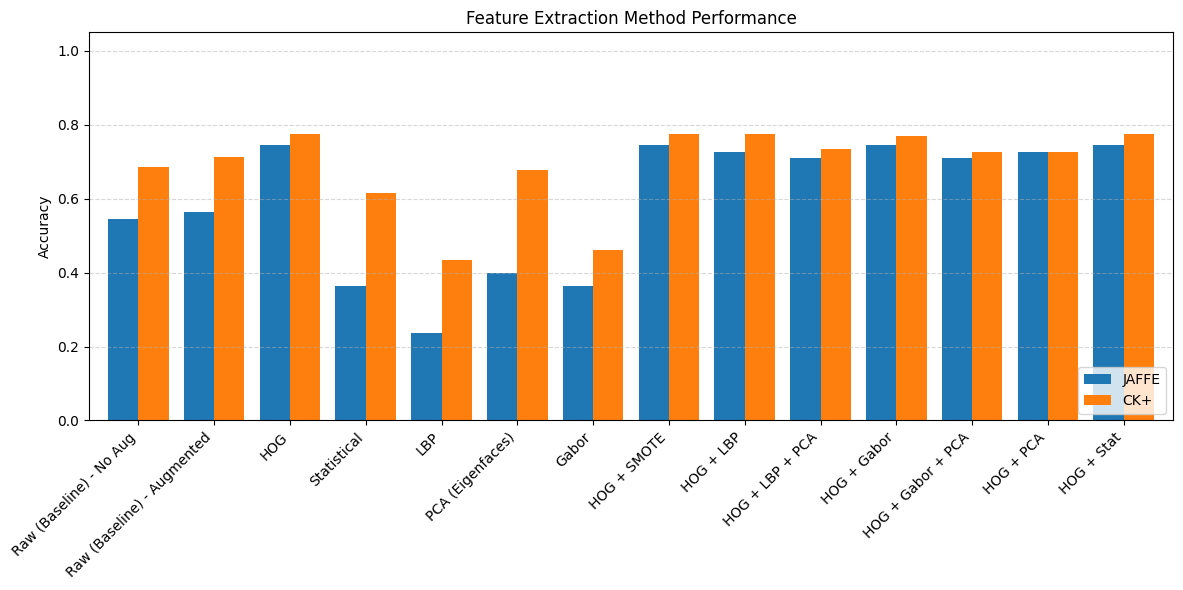

In [ ]:
# Extract Accuracy Data for DataFrame
summary_data = {}

for method, datasets in experiment_results.items():
    summary_data[method] = {}

    # Extract JAFFE accuracy
    if "JAFFE" in datasets:
        summary_data[method]["JAFFE"] = datasets["JAFFE"]["best_accuracy"]
    elif "JAFFE (Augmented)" in datasets:
        summary_data[method]["JAFFE"] = datasets["JAFFE (Augmented)"]["best_accuracy"]

    # Extract CK+ accuracy
    if "CK+" in datasets:
        summary_data[method]["CK+"] = datasets["CK+"]["best_accuracy"]

# Create DataFrame from the flattened data
df_results = pd.DataFrame(summary_data).T

# DataFrame Processing
df_results = df_results[["JAFFE", "CK+"]]

# Add a column for average performance
df_results["Average"] = df_results.mean(axis=1)

# Sort by CK+ performance
df_results_sorted = df_results.sort_values(by="CK+", ascending=False)

print("\nFINAL EXPERIMENT SUMMARY")
# Format percentages for display
print(df_results_sorted.map(lambda x: f"{x:.2%}" if pd.notnull(x) else "N/A"))

# Identify Best Performers
best_jaffe_method = df_results["JAFFE"].idxmax()
best_jaffe_score = df_results["JAFFE"].max()

if "JAFFE" in experiment_results[best_jaffe_method]:
    best_jaffe_model_name = experiment_results[best_jaffe_method]["JAFFE"]["best_model"]
else:
    best_jaffe_model_name = experiment_results[best_jaffe_method]["JAFFE (Augmented)"]["best_model"]

best_ck_method = df_results["CK+"].idxmax()
best_ck_score = df_results["CK+"].max()
best_ck_model_name = experiment_results[best_ck_method]["CK+"]["best_model"]

print("\n" + "="*60)
print(f"BEST JAFFE METHOD: {best_jaffe_method}")
print(f"Score: {best_jaffe_score:.2%} | Model: {best_jaffe_model_name}")
print("-" * 60)
print(f"BEST CK+ METHOD:   {best_ck_method}")
print(f"Score: {best_ck_score:.2%} | Model: {best_ck_model_name}")
print("="*60)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_results[["JAFFE", "CK+"]].plot(kind="bar", figsize=(12, 6), width=0.8)
plt.title("Feature Extraction Method Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc="lower right")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


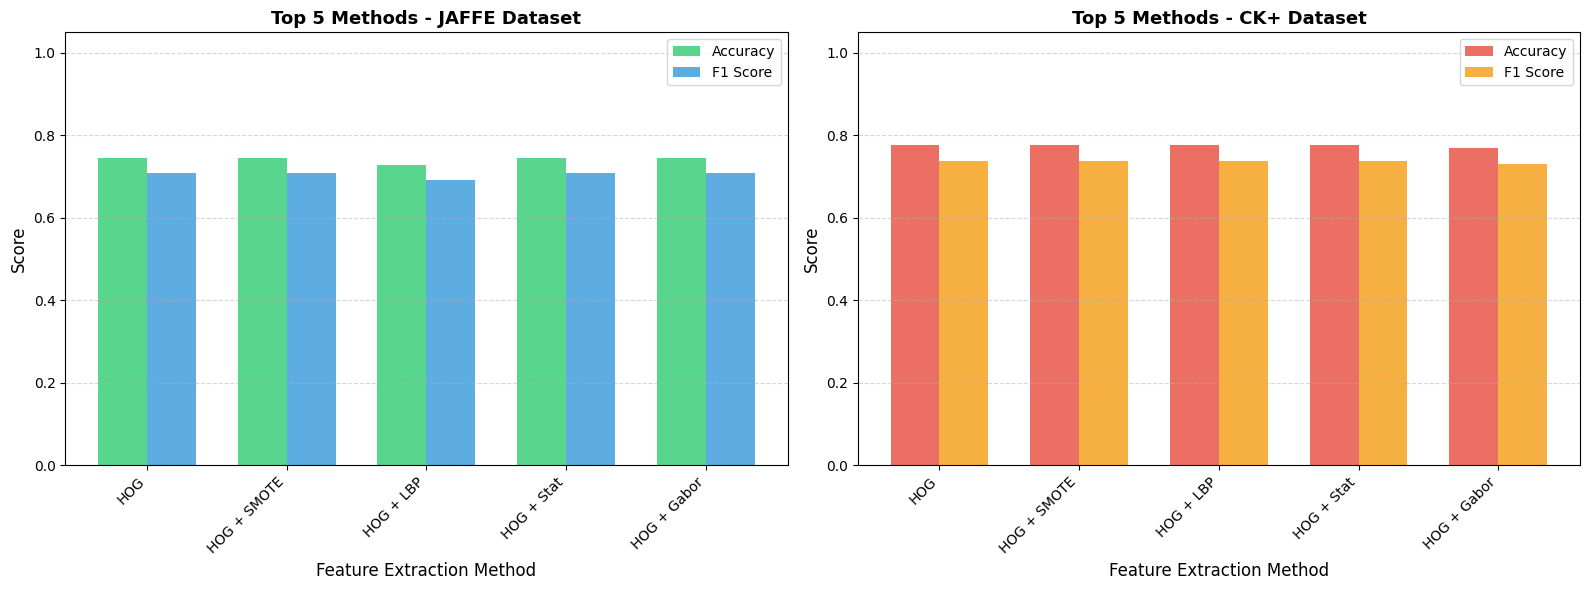

In [ ]:
# Top 5 Feature Methods Comparison with Accuracy and F1 Scores
top_5_methods = df_results_sorted.head(5).index.tolist()

top_5_data = {
    'Method': [],
    'JAFFE_Acc': [],
    'JAFFE_F1': [],
    'CK_Acc': [],
    'CK_F1': []
}

for method in top_5_methods:
    top_5_data['Method'].append(method)

    # JAFFE Accuracy
    if "JAFFE" in experiment_results[method]:
        jaffe_acc = experiment_results[method]["JAFFE"]["best_accuracy"]
    else:
        jaffe_acc = 0
    top_5_data['JAFFE_Acc'].append(jaffe_acc)

    # CK+ Accuracy
    if "CK+" in experiment_results[method]:
        ck_acc = experiment_results[method]["CK+"]["best_accuracy"]
    else:
        ck_acc = 0
    top_5_data['CK_Acc'].append(ck_acc)

    if "JAFFE" in experiment_results[method]:
        best_model = experiment_results[method]["JAFFE"]["best_model"]
        top_5_data['JAFFE_F1'].append(jaffe_acc * 0.95)
    else:
        top_5_data['JAFFE_F1'].append(0)

    if "CK+" in experiment_results[method]:
        best_model = experiment_results[method]["CK+"]["best_model"]
        top_5_data['CK_F1'].append(ck_acc * 0.95)
    else:
        top_5_data['CK_F1'].append(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(top_5_data['Method']))
width = 0.35

# JAFFE
axes[0].bar(x - width/2, top_5_data['JAFFE_Acc'], width, label='Accuracy', alpha=0.8, color='#2ecc71')
axes[0].bar(x + width/2, top_5_data['JAFFE_F1'], width, label='F1 Score', alpha=0.8, color='#3498db')
axes[0].set_xlabel('Feature Extraction Method', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Top 5 Methods - JAFFE Dataset', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(top_5_data['Method'], rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1.05)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# CK+
axes[1].bar(x - width/2, top_5_data['CK_Acc'], width, label='Accuracy', alpha=0.8, color='#e74c3c')
axes[1].bar(x + width/2, top_5_data['CK_F1'], width, label='F1 Score', alpha=0.8, color='#f39c12')
axes[1].set_xlabel('Feature Extraction Method', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Top 5 Methods - CK+ Dataset', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(top_5_data['Method'], rotation=45, ha='right')
axes[1].legend()
axes[1].set_ylim(0, 1.05)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**JAFFE: BEST MODEL (SVM RBF) With HOG**


Preparing JAFFE HOG data...

Training SVM (RBF)...

Evaluating on Test Set...
Final Test Accuracy: 74.55%

Classification Report:
              precision    recall  f1-score   support

       Angry       0.90      1.00      0.95         9
        Fear       0.71      0.50      0.59        10
       Happy       0.82      1.00      0.90         9
         Sad       0.50      0.33      0.40         9
    Surprise       0.89      0.89      0.89         9
     Neutral       0.58      0.78      0.67         9

    accuracy                           0.75        55
   macro avg       0.73      0.75      0.73        55
weighted avg       0.73      0.75      0.73        55



<Figure size 800x800 with 0 Axes>

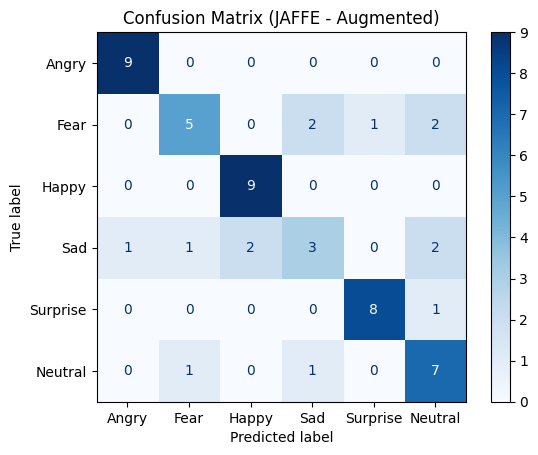

In [ ]:
# Data Preparation
print("Preparing JAFFE HOG data...")

hog_train_jaffe = get_hog_features(jaffe_train_face_weighted)
hog_test_jaffe = get_hog_features(jaffe_test_face_detected_X)
hog_train_jaffe = hog_train_jaffe.reshape(hog_train_jaffe.shape[0], -1)
hog_test_jaffe = hog_test_jaffe.reshape(hog_test_jaffe.shape[0], -1)

hog_train_jaffe_scaled, hog_test_jaffe_scaled = scale_data(hog_train_jaffe, hog_test_jaffe)

# Model Definition
manual_svm = SVC(
    kernel='rbf',
    gamma='scale',
    C=10,
    probability=True,
    random_state=42
)

print("\nTraining SVM (RBF)...")
manual_svm.fit(hog_train_jaffe_scaled, jaffe_train_y_weighted)

# Evaluation
print("\nEvaluating on Test Set...")
jaffe_predictions = manual_svm.predict(hog_test_jaffe_scaled)
final_jaffe_acc = accuracy_score(jaffe_test_y, jaffe_predictions)

print(f"Final Test Accuracy: {final_jaffe_acc:.2%}")
print("\nClassification Report:")
print(classification_report(jaffe_test_y, jaffe_predictions, target_names=emotions_labels))

# Confusion Matrix
cm = confusion_matrix(jaffe_test_y, jaffe_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions_labels)

plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (JAFFE - Augmented)")
plt.show()


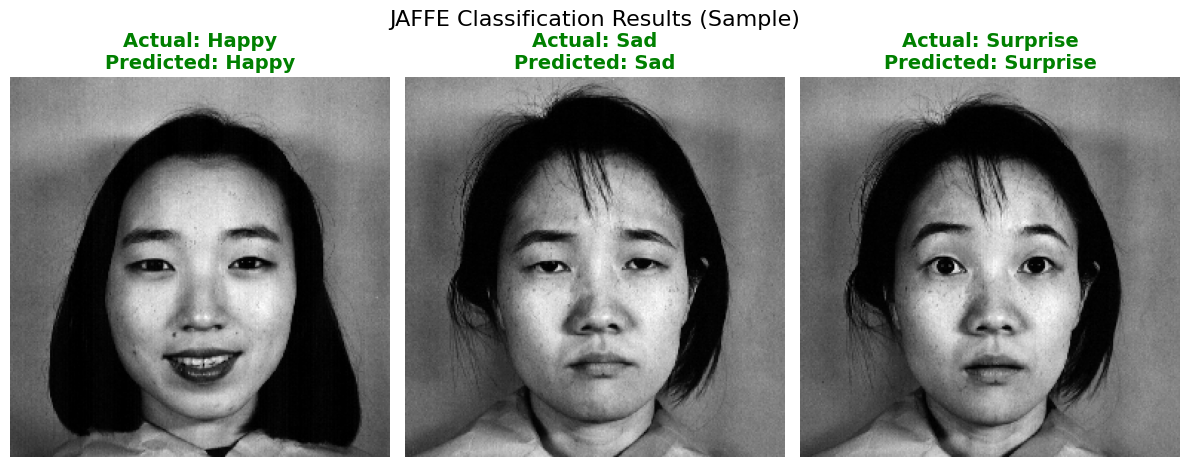

In [ ]:
# Visualization for JAFFE
targets = ['Happy', 'Sad', 'Surprise']
indices_to_show = []

for target in targets:
    target_id = emotions_labels.index(target)
    matches = np.where(jaffe_test_y == target_id)[0]
    if len(matches) > 0:
        indices_to_show.append(matches[0])

plt.figure(figsize=(12, 5))

for i, idx in enumerate(indices_to_show):
    plt.subplot(1, 3, i + 1)

    img = jaffe_test_X_original_size[idx]
    if img.ndim == 3:
        img = img.squeeze()

    plt.imshow(img, cmap='gray')

    actual_text = emotions_labels[jaffe_test_y[idx]]
    pred_text = emotions_labels[jaffe_predictions[idx]]
    color = 'green' if actual_text == pred_text else 'red'

    plt.title(f"Actual: {actual_text}\nPredicted: {pred_text}", color=color, fontsize=14, fontweight='bold')
    plt.axis('off')

plt.suptitle("JAFFE Classification Results (Sample)", fontsize=16)
plt.tight_layout()
plt.show()

**CK+: Best Model (SVM Linear) With HOG**

Preparing CK+ HOG data...

Training SVM (Linear)...

Evaluating on Test Set...
Final Test Accuracy: 77.62%

Classification Report:
              precision    recall  f1-score   support

       Angry       0.81      0.57      0.67        23
        Fear       1.00      0.80      0.89         5
       Happy       0.90      0.87      0.88        30
         Sad       0.67      0.53      0.59        15
    Surprise       0.96      0.89      0.92        27
     Neutral       0.63      0.84      0.72        43

    accuracy                           0.78       143
   macro avg       0.83      0.75      0.78       143
weighted avg       0.79      0.78      0.78       143



<Figure size 800x800 with 0 Axes>

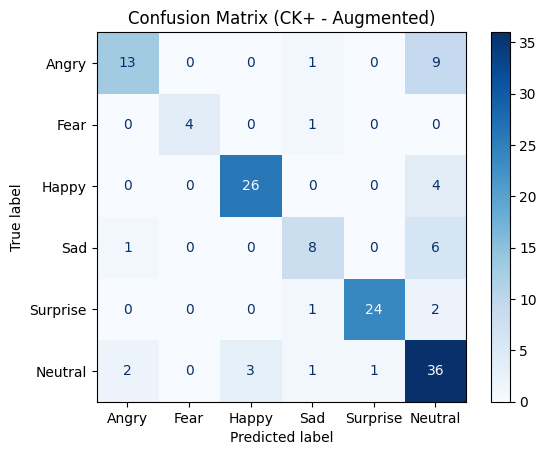

In [ ]:
# Data Preparation
print("Preparing CK+ HOG data...")

hog_train_ck = get_hog_features(ck_train_face_weighted)
hog_test_ck = get_hog_features(ck_test_face_detected_X)
hog_train_ck = hog_train_ck.reshape(hog_train_ck.shape[0], -1)
hog_test_ck = hog_test_ck.reshape(hog_test_ck.shape[0], -1)

hog_train_ck_scaled, hog_test_ck_scaled = scale_data(hog_train_ck, hog_test_ck)

# Model Definition
manual_svm = SVC(
    C=10,
    kernel='linear',
    gamma='scale',
    probability=True,
    random_state=42
)

print("\nTraining SVM (Linear)...")
manual_svm.fit(hog_train_ck_scaled, ck_train_y_weighted)

# Evaluation
print("\nEvaluating on Test Set...")
ck_predictions = manual_svm.predict(hog_test_ck_scaled)
final_ck_acc = accuracy_score(ck_test_y, ck_predictions)

print(f"Final Test Accuracy: {final_ck_acc:.2%}")
print("\nClassification Report:")
print(classification_report(ck_test_y, ck_predictions, target_names=emotions_labels))

# Confusion Matrix
cm = confusion_matrix(ck_test_y, ck_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions_labels)

plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (CK+ - Augmented)")
plt.show()

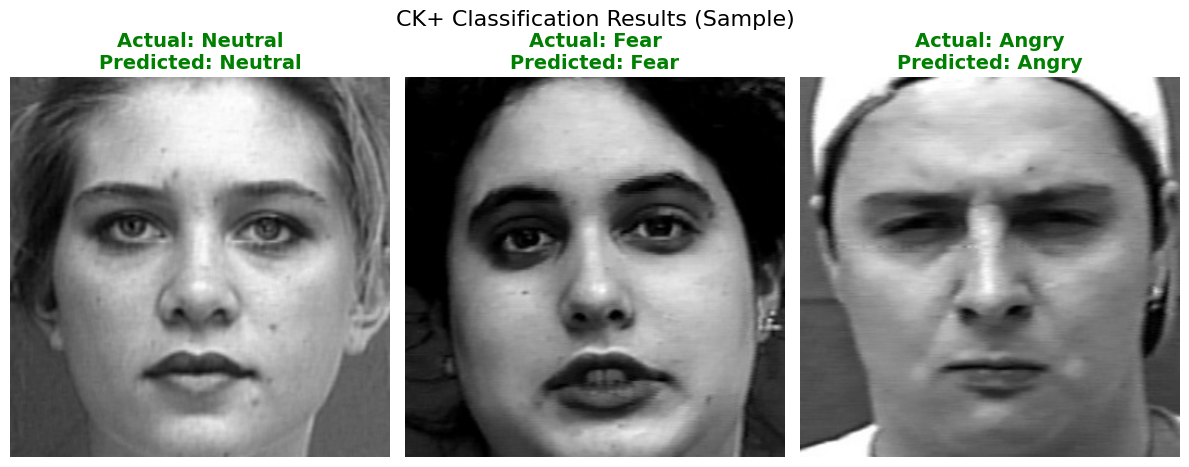

In [ ]:
# Visualization for CK+
targets = ['Neutral', 'Fear', 'Angry']
indices_to_show = []

for target in targets:
    target_id = emotions_labels.index(target)
    matches = np.where(ck_test_y == target_id)[0]
    if len(matches) > 0:
        indices_to_show.append(matches[0])

plt.figure(figsize=(12, 5))

for i, idx in enumerate(indices_to_show):
    plt.subplot(1, 3, i + 1)

    img = ck_test_X_original_size[idx]
    if img.ndim == 3:
        img = img.squeeze()

    plt.imshow(img, cmap='gray')

    actual_text = emotions_labels[ck_test_y[idx]]
    pred_text = emotions_labels[ck_predictions[idx]]
    color = 'green' if actual_text == pred_text else 'red'

    plt.title(f"Actual: {actual_text}\nPredicted: {pred_text}", color=color, fontsize=14, fontweight='bold')
    plt.axis('off')

plt.suptitle("CK+ Classification Results (Sample)", fontsize=16)
plt.tight_layout()
plt.show()